# Get started with `boxdetect.pipelines`


In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../.")

### Display original image

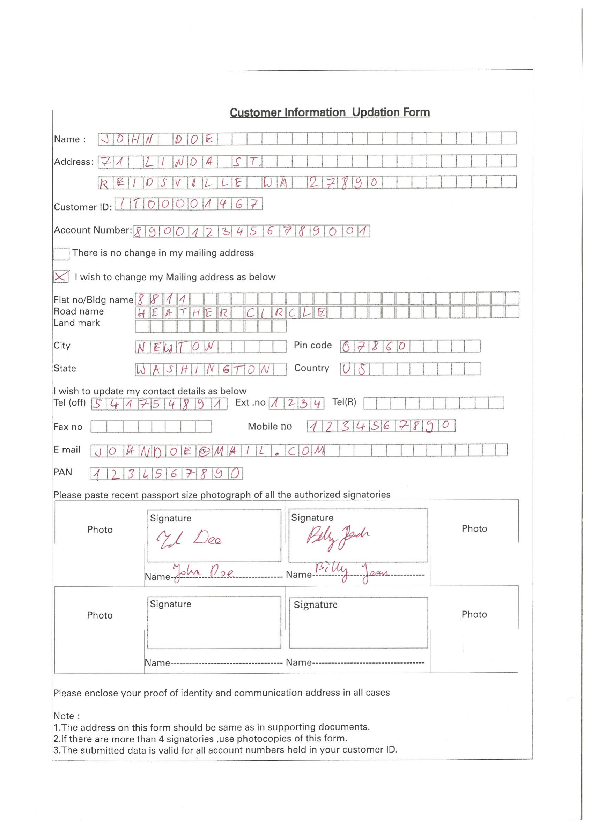

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

file_path = '../images/form_example1.png'

input_image = cv2.imread(file_path)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(input_image)
plt.show()

# Search for character boxes and group them together 

### Adjust config to work for your documents and images

In [3]:
from boxdetect import config

cfg = config.PipelinesConfig()

# important to adjust these values to match the size of boxes on your image
cfg.width_range = (30, 50)
cfg.height_range = (30, 35)

# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [1.0]

# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.5, 1.8)

# range of groups sizes to be returned
cfg.group_size_range = (1, 100)

# for this image we will use rectangles as a kernel for morphological transformations
cfg.morph_kernels_type = 'rectangles'  # 'lines'

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

### Use `get_boxes` pipeline to easily get your results

In [4]:
from boxdetect.pipelines import get_boxes

rects, grouping_rects, image, output_image = get_boxes(
    file_path, cfg=cfg, plot=False)

Processing file:  ../images/form_example1.png


In [5]:
# Each of the returned elements are rectangular bounding boxes representing grouped character boxes (x, y, w, h)
grouping_rects

[(263, 362, 1197, 38),
 (263, 428, 1197, 37),
 (263, 488, 1197, 37),
 (311, 551, 421, 34),
 (363, 629, 677, 35),
 (136, 695, 43, 34),
 (135, 760, 41, 33),
 (370, 821, 1098, 37),
 (370, 860, 1098, 37),
 (370, 902, 431, 34),
 (369, 960, 432, 35),
 (957, 959, 399, 34),
 (369, 1025, 432, 35),
 (957, 1024, 401, 34),
 (245, 1124, 386, 34),
 (753, 1123, 155, 34),
 (1024, 1122, 400, 34),
 (242, 1190, 345, 33),
 (862, 1187, 422, 34),
 (242, 1256, 1192, 37),
 (240, 1324, 435, 34)]

In [6]:
rects

array([[ 459, 1325,   41,   32],
       [ 418, 1325,   38,   32],
       [ 382, 1325,   34,   31],
       ...,
       [1162,  363,   40,   33],
       [1418,  362,   41,   33],
       [1374,  362,   43,   33]], dtype=int32)

### Display image with detected boxes
Green color - detected boxes  
Red color - boxes grouped together based on distance parameters

Processing file:  ../images/form_example1.png


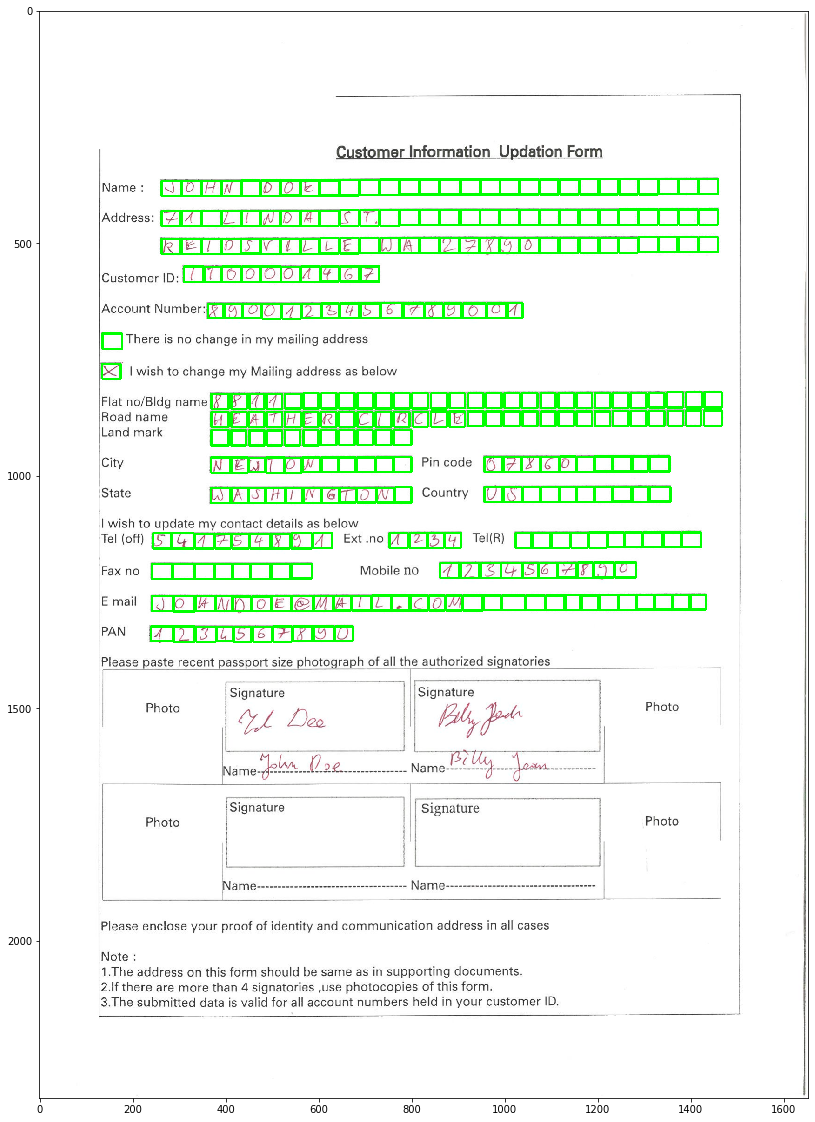

In [7]:
from boxdetect.img_proc import draw_rects, get_image
import matplotlib.pyplot as plt
%matplotlib inline

out_img = draw_rects(get_image(file_path), rects, thickness=3)

plt.figure(figsize=(15,20))
plt.imshow(out_img)
plt.show()

### Display detected boxes

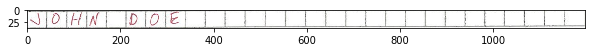

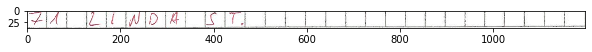

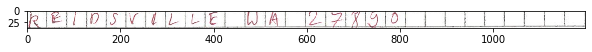

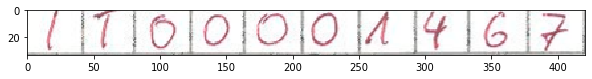

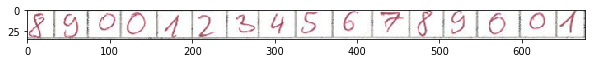

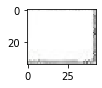

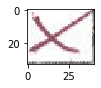

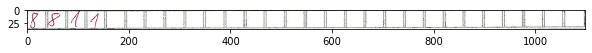

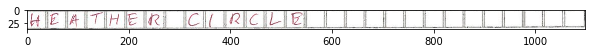

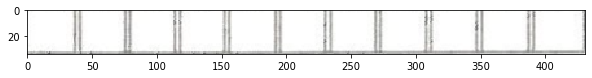

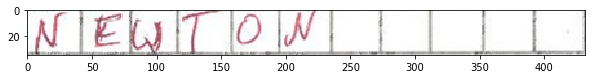

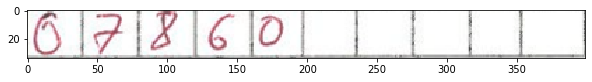

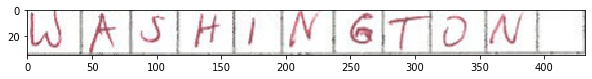

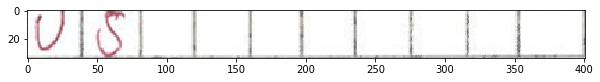

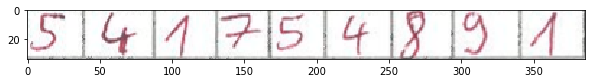

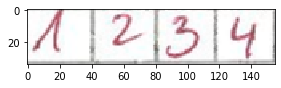

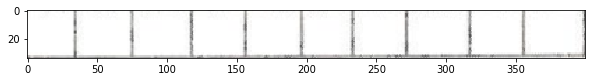

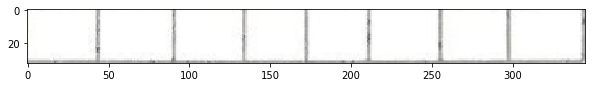

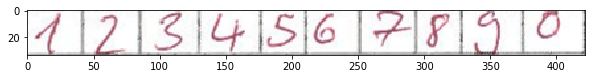

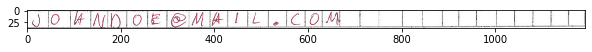

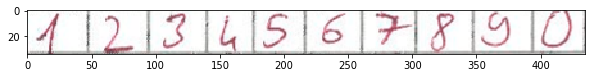

In [8]:
import cv2

org_img = cv2.imread(file_path)

for rect in grouping_rects:
    x1 = rect[0]
    x2 = x1 + rect[2]
    y1 = rect[1]
    y2 = y1 + rect[3]
    plt.figure(figsize=(10,1))
    plt.imshow(org_img[y1:y2, x1:x2])
    plt.show()

## Use `get_checkboxes` to search for checkboxes and recognize if marked/ticked/checked based on pixels presence

In [9]:
from boxdetect.pipelines import get_checkboxes

file_path = '../images/form_example1.png'

checkboxes = get_checkboxes(
    file_path, cfg=cfg, px_threshold=0.1, plot=False, verbose=True)

Processing file:  ../images/form_example1.png
----------------------------------
nonzero_px_count:  2
all_px_count:  744
nonzero_px_count / all_px_count =  0.002688172043010753
----------------------------------
----------------------------------
nonzero_px_count:  305
all_px_count:  725
nonzero_px_count / all_px_count =  0.4206896551724138
----------------------------------


### Looking into the results

Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (136, 695, 43, 34)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


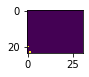

Checkbox bounding rectangle (x,y,width,height):  (135, 760, 41, 33)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


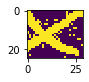

In [10]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()

# Detect checkboxes for another image

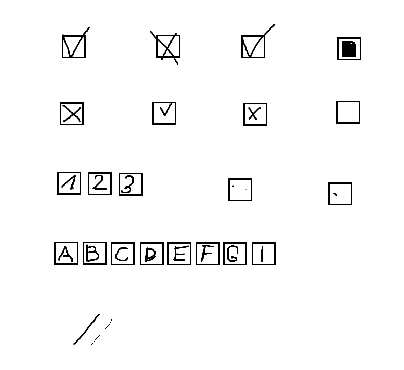

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

file_path = '../tests/data/dummy_example2.png'

input_image = cv2.imread(file_path)
plt.figure(figsize=(7, 7))
plt.axis('off')
plt.imshow(input_image)
plt.show()

### Adjust the config for the new file

In [12]:
from boxdetect import config

cfg = config.PipelinesConfig()

# important to adjust these values to match the size of boxes on your image
cfg.width_range = (40,60)
cfg.height_range = (40,60)

# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [0.5]

# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.5, 1.5)

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

### Process image and get checkboxes

In [13]:
from boxdetect.pipelines import get_checkboxes

# px_threshold set to 0.1 is basically saying that every checkbox
# with more than 10% of white pixels inside should be considered as checked
checkboxes = get_checkboxes(
    file_path, cfg=cfg, px_threshold=0.1, plot=False, verbose=True)

Processing file:  ../tests/data/dummy_example2.png
----------------------------------
nonzero_px_count:  234
all_px_count:  960
nonzero_px_count / all_px_count =  0.24375
----------------------------------
----------------------------------
nonzero_px_count:  259
all_px_count:  960
nonzero_px_count / all_px_count =  0.26979166666666665
----------------------------------
----------------------------------
nonzero_px_count:  200
all_px_count:  960
nonzero_px_count / all_px_count =  0.20833333333333334
----------------------------------
----------------------------------
nonzero_px_count:  769
all_px_count:  1088
nonzero_px_count / all_px_count =  0.7068014705882353
----------------------------------
----------------------------------
nonzero_px_count:  349
all_px_count:  1088
nonzero_px_count / all_px_count =  0.32077205882352944
----------------------------------
----------------------------------
nonzero_px_count:  173
all_px_count:  1088
nonzero_px_count / all_px_count =  0.1590073529

### Look into the results

Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (108, 56, 44, 42)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


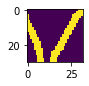

Checkbox bounding rectangle (x,y,width,height):  (294, 56, 44, 42)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


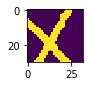

Checkbox bounding rectangle (x,y,width,height):  (460, 56, 44, 42)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


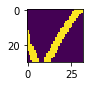

Checkbox bounding rectangle (x,y,width,height):  (645, 59, 46, 44)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


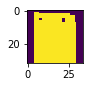

Checkbox bounding rectangle (x,y,width,height):  (103, 187, 46, 44)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


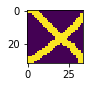

Checkbox bounding rectangle (x,y,width,height):  (285, 185, 46, 44)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


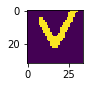

Checkbox bounding rectangle (x,y,width,height):  (463, 187, 46, 44)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


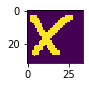

Checkbox bounding rectangle (x,y,width,height):  (643, 183, 46, 44)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


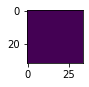

Checkbox bounding rectangle (x,y,width,height):  (433, 335, 46, 44)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


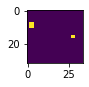

Checkbox bounding rectangle (x,y,width,height):  (629, 343, 46, 44)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


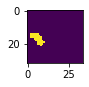

In [14]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()